In [2]:
import torch

x = torch.ones(2, 2)
print(x)
print(x.dtype)



tensor([[1., 1.],
        [1., 1.]])
torch.float32


In [ ]:
x = torch.ones(2, 2, dtype=torch.int8)
print(x)
print(x.dtype)

tensor([[1, 1],
        [1, 1]], dtype=torch.int8)
torch.int8


converting tensors into numpy arrays

In [ ]:
x=torch.rand(2,2)
print(x)
print(x.dtype)

tensor([[0.5630, 0.8772],
        [0.1802, 0.9113]])
torch.float32


In [ ]:
y=x.numpy()
print(y)
print(y.dtype)

[[0.5630268  0.8772246 ]
 [0.18024701 0.91125053]]
float32


converting numpy arrays into tensors

In [ ]:
import numpy as np
x=np.zeros((2,2),dtype=np.float32)
print(x)
print(x.dtype)


[[0. 0.]
 [0. 0.]]
float32


In [ ]:
y=torch.from_numpy(x)
print(y)
print(y.dtype)

tensor([[0., 0.],
        [0., 0.]])
torch.float32


In [ ]:
x=torch.tensor([1.5, 2])
print(x)
print(x.device)

tensor([1.5000, 2.0000])
cpu


In [ ]:
if torch.cuda.is_available():
 device = torch.device("cuda:0")

In [ ]:
x = x.to(device)
print(x)
print(x.device)

NameError: name 'device' is not defined

In [1]:
from torchvision import datasets
path = '/content/sample_data'

train_data = datasets.MNIST(path,train=True,download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 59833392.21it/s]


Extracting /content/sample_data/MNIST/raw/train-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1919650.31it/s]

Extracting /content/sample_data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14318586.08it/s]


Extracting /content/sample_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7304650.60it/s]

Extracting /content/sample_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw



extract input and target variables

In [3]:
x_train,y_train = train_data.data,train_data.targets
print(x_train.shape)
print(y_train.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


loading test data

In [4]:
val_data = datasets.MNIST(path,train=False,download=True)

x_val,y_val = val_data.data , val_data.targets

print(x_val.shape)
print(y_val.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])


changing dimension

In [5]:
x_train = x_train.unsqueeze(1)
x_val = x_val.unsqueeze(1)
print(x_train.shape)
print(x_val.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


torch.Size([3, 152, 242])


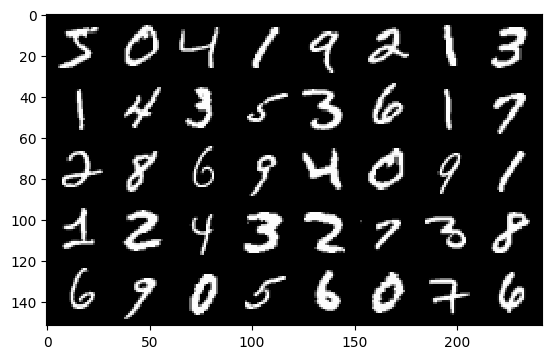

In [6]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np


def show(img):
  npimg = img.numpy()
  npimg_tr =np.transpose(npimg,(1,2,0))
  plt.imshow(npimg_tr,interpolation='nearest')


x_grid=utils.make_grid(x_train[:40], nrow=8, padding=2)
print(x_grid.shape)

show(x_grid)

Data Loader

In [7]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
train_ds = TensorDataset(x_train,y_train)
val_ds = TensorDataset(x_val,y_val)


train_dl = DataLoader(train_ds,batch_size=8)
val_dl = DataLoader(val_ds,batch_size=8)

for xb,yb in train_dl:
  print(xb.shape)
  print(yb.shape)
  break



torch.Size([8, 1, 28, 28])
torch.Size([8])


Building Model

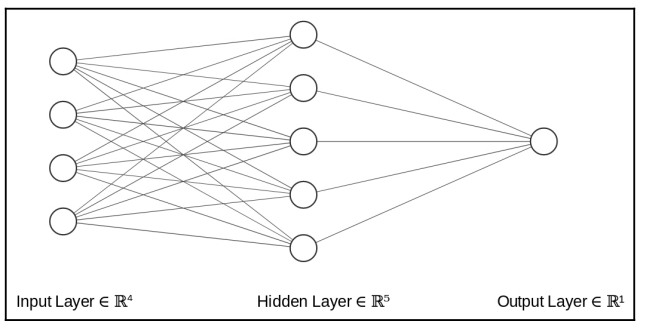

In [ ]:
from torch import nn
model = nn.Sequantial(
    nn.Linear(4,5),
    nn.Relu(),
    nn.Linear(5,1),
)

print(model)

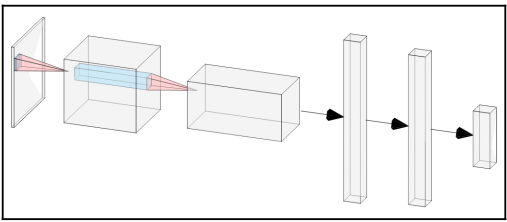

In [ ]:
import torch.nn.functional as F
from torch import nn

class Net(nn.Module):
  def __init__(self):
      super(Net, self).__init__()
  def forward(self, x):
       pass

def __init__(self):
    super(Net,self).__init()
    self.conv1 = nn.Conv2d(1,20,5,1)
    self.conv2 = nn.Conv2d(20,50,5,1)
    self.fc1 = nn.Linear(4*4*50, 500)
    self.fc2 = nn.Linear(500, 10)


def forward(self,x):
  x = F.relu(self.conv1(x))
  x = F.max_pool2d(x, 2, 2)
  x = F.relu(self.conv2(x))
  x = F.max_pool2d(x, 2, 2)
  x = x.view(-1, 4*4*50)
  x = F.relu(self.fc1(x))
  x = self.fc2(x)
  return F.log_softmax(x, dim=1)


Net.__init__ = __init__
Net.forward = forward

model = Net()
print(model)








learning to move model to cuda device

In [ ]:
device = torch.device("cuda:0")
model.to(device)
print(next(model.parameters()).device)

In [ ]:
from torchsummary
summary(model, input_size=(1, 28, 28))

LOSS Function

In [ ]:
#negative log-likelihood loos:
loss_func = nn.NLLLoss()

for xb, yb in train_dl:
 xb=xb.type(torch.float)
 yb=yb
 out=model(xb)
 loss = loss_func(out, yb)
 print (loss.item())
 break

#calculate gradient
loss.backward()


Defining the optimizer

In [ ]:
from torch import optim
#input to the optimizer are model parameters and learning rate
opt = optim.Adam(model.parameters(),lr=1e-4)
#to automatically update the model parameters
opt.step()
#set the gradient to zero before calculating of next batch
opt.zero_grad()


compute the loss value per mini-batch

In [ ]:
def loss_batch(loss_func, xb, yb,yb_h, opt=None):
    # obtain loss
      loss = loss_func(yb_h, yb)
      # obtain performance metric
      metric_b = metrics_batch(yb,yb_h)
      if opt is not None:
      loss.backward()
      opt.step()
      opt.zero_grad()
      return loss.item(), metric_b